In [1]:
from __future__ import division, print_function
from getCitiBikeCSV import getCitiBikeCSV
import os
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats
from scipy.stats import norm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Linking this exercise with the one , I submitted previously , I took the same data. That data as Federica suggested I took mothns from spring which has more users. so I took data from April, May and June of 2015.

In [2]:
datestring = ['201504','201505','201506']
for i in range(0,len(datestring)):
    getCitiBikeCSV(datestring[i])
    df= pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[i] + '-citibike-tripdata.csv')

('Downloading', '201504')
file in place, you can continue
('Downloading', '201505')
file in place, you can continue
('Downloading', '201506')
file in place, you can continue


In [3]:
df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1


As we want to distribute the age , we transform the date of birth into age :

In [4]:
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [5]:
df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,31.0
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,18.0


In [6]:
#I drop nan values
df.dropna(inplace = True)

Just to see how is our distribution i plotted:

In [7]:
df.age.value_counts().head()

30.0    34632
32.0    34051
31.0    33994
29.0    31382
28.0    31115
Name: age, dtype: int64

In [8]:
age = df.age.value_counts().index
frecuency = df.age.value_counts().values

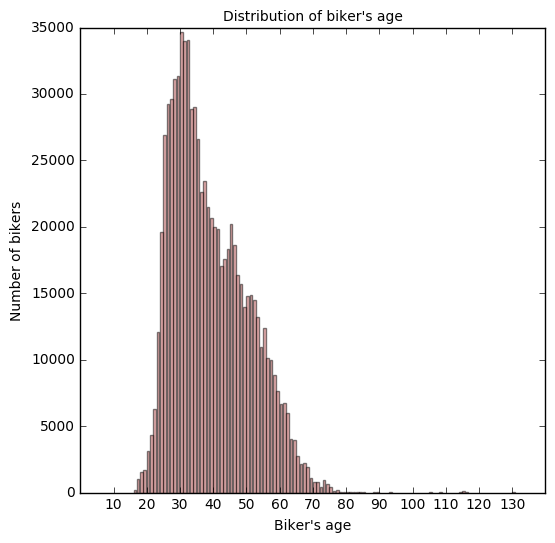

In [9]:
fig = pl.figure(figsize(6,6))
ax = pl.bar(age,frecuency, color = 'Indianred', alpha=0.5)
ax = pl.title('Distribution of biker\'s age', fontsize = 10)
ax = pl.xlabel('Biker\'s age', fontsize = 10)
ax = pl.ylabel('Number of bikers')
ax = pl.xticks(size=10)
ax = pl.xticks(np.arange(10,140,10),size=10)
pl.show()

### Figure 1. Plotted of the distribution of biker's age.

Before doing anything else, It can be seen that there are some bikers that are above 80 , althought it is not a significance quantity. Also it seems to be strange that are bikers above 80. so i just eliminated.

In [10]:
df.age = df.age[df.age<=80]
age = df.age.value_counts().index
frecuency = df.age.value_counts().values

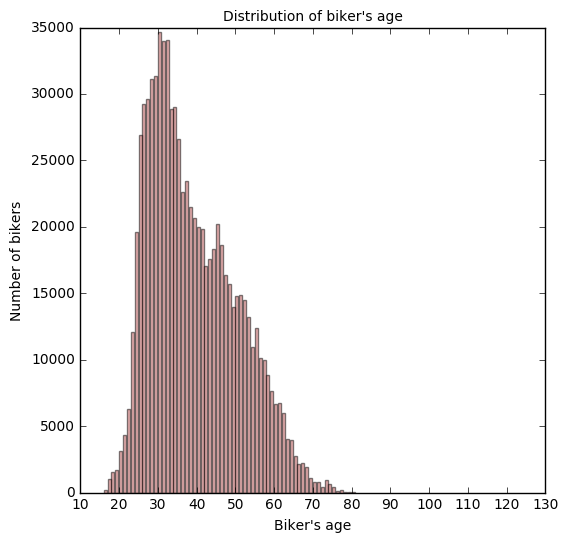

In [12]:
fig = pl.figure(figsize(6,6))
ax = pl.bar(age,frecuency, color = 'Indianred', alpha=0.5)
ax = pl.title('Distribution of biker\'s age', fontsize = 10)
ax = pl.xlabel('Biker\'s age', fontsize = 10)
ax = pl.ylabel('Number of bikers')
ax = pl.xticks(size=10)
ax = pl.xticks(np.arange(10,140,10),size=10)
pl.show()

### Figure 2. Plotted of the distribution of biker's age wih a reduced data set (until 80 years old)

Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution. 

•Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.


•Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

First, I will get the mu and signma from our data set.

In [13]:
df.dropna(inplace = True)
df.age.count()

810464

In [14]:
mean = df.age.mean()
mean

38.712776878430134

In [15]:
std = df.age.std()
std

11.369492056582025

So I want to test if N(mean, std) is a sensible model.

In [16]:
#generating the Normal distribution:

In [17]:
np.random.seed(336)

In [18]:
normal_age = np.random.normal(mean,std, 810464)

In [19]:
normal_age = (normal_age/1).round()

### Test two sized test of KS:

In [21]:
# from http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

Perform the Kolmogorov-Smirnov test for goodness of fit.

This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x).

Under the null hypothesis the two distributions are identical, G(x)=F(x)

**$Ho$** : F(age) = N(mu,std) with alpha=0.05

Therefore: $Ha$: F(age) <> N(mu,std)

As it is said random , the distribution doesnt have to be sorted

In [22]:
scipy.stats.kstest(df.age,'norm',args = [mean,std])

KstestResult(statistic=0.10332465024039783, pvalue=0.0)

As it can be observed the two sided test of KS return a **p-value =0.0** , which is a small value so We cannot reject the Null Hypothesys. Therefore, if the Null Hypothesis **is rejected** at a significance level of 0.05  means that the distributons are not identical

### Test Andersor- Darling:

#http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html 
The null hypothesis that a sample is drawn from a population that follows a particular distribution.

H0: the data follow the specified distribution

HA: the data do not follow the specified distribution.

My significance level will be alpha=0.05

In [23]:
scipy.stats.anderson(df.age,'norm')

AndersonResult(statistic=11435.049942093552, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

As the static is way bigger than the critical value that means that they are not related. so we **rejected** the Null Hypothesis. So Therefore , the distributin of bikers doesn´t follow a Normal Distribution.

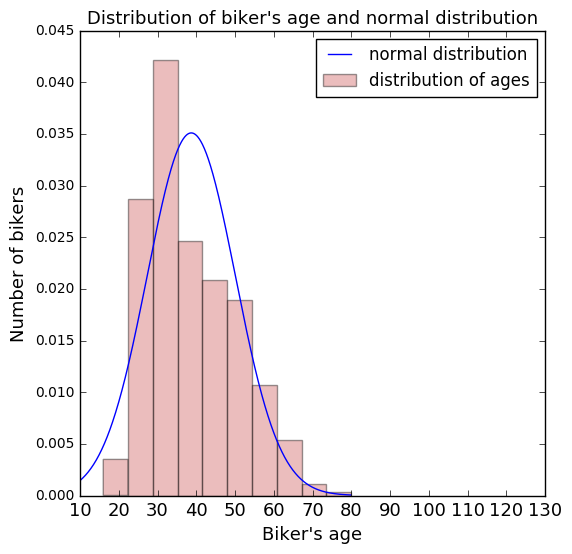

In [74]:
pl.hist(df.age, normed = True, label='distribution of ages', color ='IndianRed', alpha = 0.4)
pl.plot(arange(10,80,.1),scipy.stats.norm.pdf(arange(10,80,.1),mean,std), label='normal distribution')
ax = pl.title('Distribution of biker\'s age and normal distribution', fontsize = 13)
ax = pl.xlabel('Biker\'s age', fontsize = 13)
ax = pl.ylabel('Number of bikers', fontsize = 13)
ax = pl.xticks(size=13)
ax = pl.xticks(np.arange(10,140,10),size=13)
ax = pl.legend()
pl.show()

### Figure 3. Histogram of the distribution of biker's age wih a reduced data set (until 80 years old) and the normal distribution that shows that are not the same distribution and that doesn´t fit.

### Binomial distribution

The second distribution i will try t compare is a binomial distribution

In [25]:
n=len(df.age)
mean
p = mean/n
p

4.7766189341451483e-05

In [26]:
binomial = np.random.binomial(n,p,size=len(df.age))

### Test two sized test of KS:

Under the null hypothesis the two distributions are identical, G(x)=F(x)

Ho : F(age) = N(mu,std) with alpha=0.05

Therefore: Ha: F(age) <> N(mu,std)


In [27]:
scipy.stats.kstest(df.age,'binom',args=(n,p))

KstestResult(statistic=0.21238474656555992, pvalue=0.0)

As it can be observed the two sided test of KS return a **p-value =0.0** , which is a small value so We cannot reject the Null Hypothesys. Therefore, if the Null Hypothesis **is rejected** at a significance level of 0.05  means that the distributons are not identical

### Test tChisquare:

In [28]:
# From: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

null hypothesis that the categorical data has the given frequencies.

In [29]:
scipy.stats.chisquare(df.age,binomial)

Power_divergenceResult(statistic=3634879.4404140306, pvalue=0.0)

As it can be observed the two sided test of KS return a p-value =0.0 , which is a small value so We cannot reject the Null Hypothesys. Therefore, if the Null Hypothesis is rejected at a significance level of 0.05 means that the distributon does ot follow the frecuencies of the binomial.

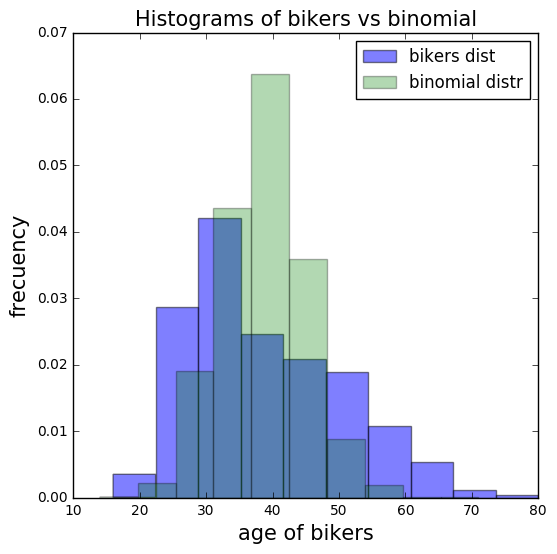

In [76]:
pl.hist(df.age, normed = True, alpha=0.5, label='bikers dist')
pl.hist(binomial,normed = True, alpha=0.3, label = 'binomial distr')
pl.title('Histograms of bikers vs binomial', size=15)
pl.xlabel('age of bikers', size=15)
pl.ylabel('frecuency', size=15)
pl.legend()

### Figure 4. Histograms of the distribution of biker's age wih a reduced data set (until 80 years old) and the binomial distribution that shows that are not the same distribution and that doesn´t fit.